In [1]:
#Gaussian Naive Bayes- using Gaussian instead of other Naive Bayes Classifiers since its more suitable to continuous numbers such as pixels in an image.(Analytics Vidhya, 2025)(Medium,2020)

#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, RocCurveDisplay, classification_report


In [2]:
#loading digits dataset
from sklearn.datasets import load_digits
data_set = load_digits()
df = pd.DataFrame(data_set.data, columns=data_set.feature_names)

#selecting features and target
X = df.loc[:, data_set.feature_names].values
Y = data_set.target

#spliting traing and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=72)

#fit the model
model_gnb = GaussianNB() #(Scikit, 2025)
model_gnb.fit(X_train, Y_train)

GaussianNB()

In [3]:
#model prediction & evaluation
pred_gnb = model_gnb.predict(X_test)
bal_acc_gnb = balanced_accuracy_score(Y_test, pred_gnb) #evaluating balanced accuracy (Scikit, 2025)
roc_gnb = roc_auc_score(Y_test, model_gnb.predict_proba(X_test), multi_class="ovr", average="macro") #calculating ROC score, using one-vs rest approach to calculate one class against all other classes (Scikit, 2025)

print("Blanced Accuracy of Default GNB:", bal_acc_gnb)
print("\nROC AUC Score of Default GNB:", roc_gnb)
print("\nClassification Report of Default GNB:\n", classification_report(Y_test, pred_gnb))

Blanced Accuracy of Default GNB: 0.8195914387281524

ROC AUC Score of Default GNB: 0.9801798634402952

Classification Report of Default GNB:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.88      0.66      0.75        32
           2       0.96      0.66      0.78        41
           3       0.95      0.60      0.73        30
           4       0.96      0.84      0.90        32
           5       0.94      0.83      0.88        36
           6       0.90      0.97      0.94        39
           7       0.74      1.00      0.85        31
           8       0.47      0.95      0.63        38
           9       0.97      0.71      0.82        41

    accuracy                           0.82       360
   macro avg       0.88      0.82      0.83       360
weighted avg       0.88      0.82      0.83       360



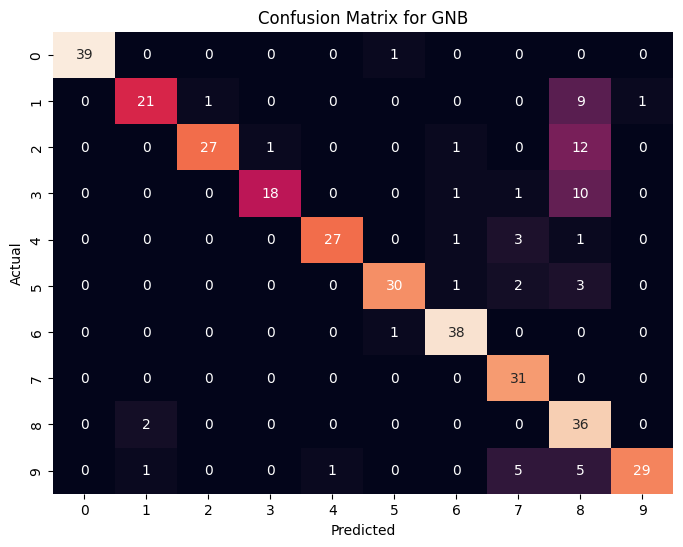

In [4]:
#Confusion matrix
cm_gnb = confusion_matrix(Y_test, pred_gnb)

#ploting the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for GNB")
plt.show()

In [5]:
#Hyperparamter tuning to find optimal parameters (Scikit, 2025)

param_grid = {"var_smoothing": [1e-9, 1e-8, 1e-7, 1e-6, 1e-5], #to increase stability
              "priors": [None],} #since the dataset is appromximately balanced, I opted to not specify prior probabilities as its almost equal for each class. Aditionally, specifiying prior probabilites yields the same result as deafualt priors obtained from training the data. This suggests that the parameter is already optimal and does not need to be tuned

grid_search = GridSearchCV(model_gnb, param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)
print("\nOptimal parameters of GNB: ", grid_search.best_params_)

optimal_model_gnb = grid_search.best_estimator_
optimal_model_gnb.fit(X_train, Y_train)
optimal_pred_gnb = optimal_model_gnb.predict(X_test)
bal_acc_best_model_gnb = balanced_accuracy_score(Y_test, optimal_pred_gnb)

print("\nBlanced Accuracy based on optimal parameters of GNB:", bal_acc_best_model_gnb)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Optimal parameters of GNB:  {'priors': None, 'var_smoothing': 1e-05}

Blanced Accuracy based on optimal parameters of GNB: 0.9026695481276675


ROC AUC Score of Optimal GNB: 0.9828789285938428


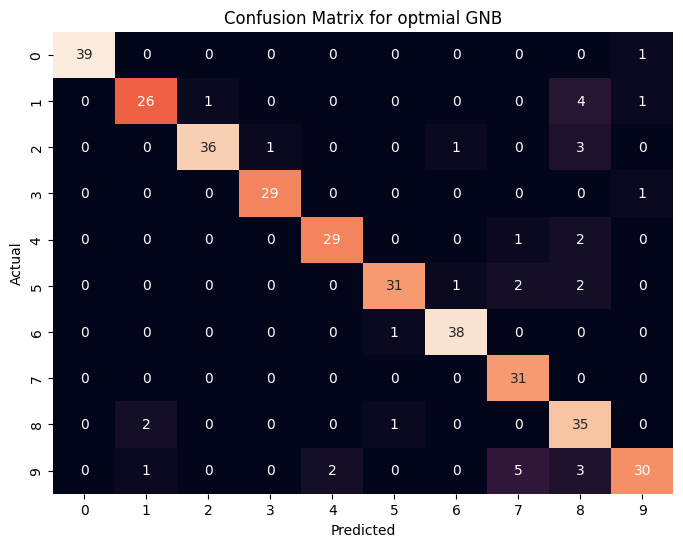

In [6]:
#Results for GNB with optimal parameters
#ROC
roc_optmial_model_gnb = roc_auc_score(Y_test, optimal_model_gnb.predict_proba(X_test), multi_class="ovr", average="macro")
print("ROC AUC Score of Optimal GNB:", roc_optmial_model_gnb)

#Confusion matrix
cm_optimal_model_gnb = confusion_matrix(Y_test, optimal_pred_gnb)

#ploting the matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_optimal_model_gnb, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for optmial GNB")
plt.show()

